# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Maulidina Maulani]
- **Email:** [mlidinalni@gmail.com]
- **ID Dicoding:** [mlidinalni]

## Menentukan Pertanyaan Bisnis

1. Bagaimana pihak yang mendistribusikan penyewaan sepeda dihitung dengan jumlah berdasarkan pengaruh musim?
2. Bagaimana pola penyewaan sepeda weekday dan weekend?

## Import Semua Packages/Library yang Digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


## Data Wrangling

Data Gathering

In [6]:
# Gathering Data
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv.zip')


Menampilkan data 'day'

In [7]:
# Display the first few rows of the gathered data
display(day_df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Menampilkan data 'hour'

In [8]:
display(hour_df.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Data Assessing

In [9]:
# Assessing Data for day_df
print("Info for day_df:")
print(day_df.info())

Info for day_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [10]:

print("\nFirst few rows of day_df:")
display(day_df.head())


First few rows of day_df:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Gathering Data

In [11]:
print("\nDescriptive Statistics for day_df:")
display(day_df.describe())


Descriptive Statistics for day_df:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
print("\nChecking for missing values in day_df:")
display(day_df.isnull().sum())


Checking for missing values in day_df:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
print("\nChecking for duplicate rows in day_df:")
display(day_df.duplicated().sum())



Checking for duplicate rows in day_df:


0

In [14]:
# Repeat the same for hour_df
print("\n-----------------------\n")


-----------------------



### Assessing Data

In [15]:
# Assessing Data for hour_df
print("Info for hour_df:")
print(hour_df.info())

Info for hour_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [16]:
print("\nFirst few rows of hour_df:")
display(hour_df.head())


First few rows of hour_df:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
print("\nDescriptive Statistics for hour_df:")
display(hour_df.describe())



Descriptive Statistics for hour_df:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [18]:
print("\nChecking for missing values in hour_df:")
display(hour_df.isnull().sum())


Checking for missing values in hour_df:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
print("\nChecking for duplicate rows in hour_df:")
display(hour_df.duplicated().sum())



Checking for duplicate rows in hour_df:


0

### Cleaning Data

Cleaning data for day

In [20]:
# Cleaning Data for day_df

# Convert 'dteday' to datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
# Fill missing values by carrying forward the last non-null value
day_df.ffill(inplace=True)
# Correct data types for categorical variables
day_df['season'] = day_df['season'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')
# Remove any duplicate rows if they exist
day_df.drop_duplicates(inplace=True)



Cleaning data for hour

In [21]:

# Convert 'dteday' to datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
# Fill missing values by carrying forward the last non-null value
day_df.ffill(inplace=True)
# Correct data types for categorical variables and correct any wrong data types
hour_df['season'] = hour_df['season'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')
# Assume 'hr' should be of type 'category' because it represents hours of the day
hour_df['hr'] = hour_df['hr'].astype('category')
# Remove any duplicate rows if they exist
hour_df.drop_duplicates(inplace=True)


Display data frame dan shape pada folder day dan hour

In [22]:
# Display DataFrame to verify changes
display(day_df.head())
display(hour_df.head())

# Display the shape to see if any rows were dropped
print(day_df.shape)
print(hour_df.shape)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(731, 16)
(17379, 17)


## Exploratory Data Analysis (EDA)

### Explore ...


Cara mengelompokkan data

In [23]:
aggregated_data = day_df.groupby('season', observed=True).agg({'cnt': ['max', 'min', 'mean', 'sum']})
aggregated_data.columns = ['Max Count', 'Min Count', 'Average Count', 'Total Count']
aggregated_data = aggregated_data.reset_index()
print(aggregated_data)

  season  Max Count  Min Count  Average Count  Total Count
0      1       7836        431    2604.132597       471348
1      2       8362        795    4992.331522       918589
2      3       8714       1115    5644.303191      1061129
3      4       8555         22    4728.162921       841613


In [24]:

weather_aggregated_data = day_df.groupby('weathersit', observed=True).agg({'cnt': ['max', 'min', 'mean', 'sum']})
weather_aggregated_data.columns = ['Max Count', 'Min Count', 'Average Count', 'Total Count']
weather_aggregated_data = weather_aggregated_data.reset_index()
print(weather_aggregated_data)

  weathersit  Max Count  Min Count  Average Count  Total Count
0          1       8714        431    4876.786177      2257952
1          2       8362        605    4035.862348       996858
2          3       4639         22    1803.285714        37869


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pihak yang mendistribusikan penyewaan sepeda dihitung dengan jumlah berdasarkan pengaruh musim?

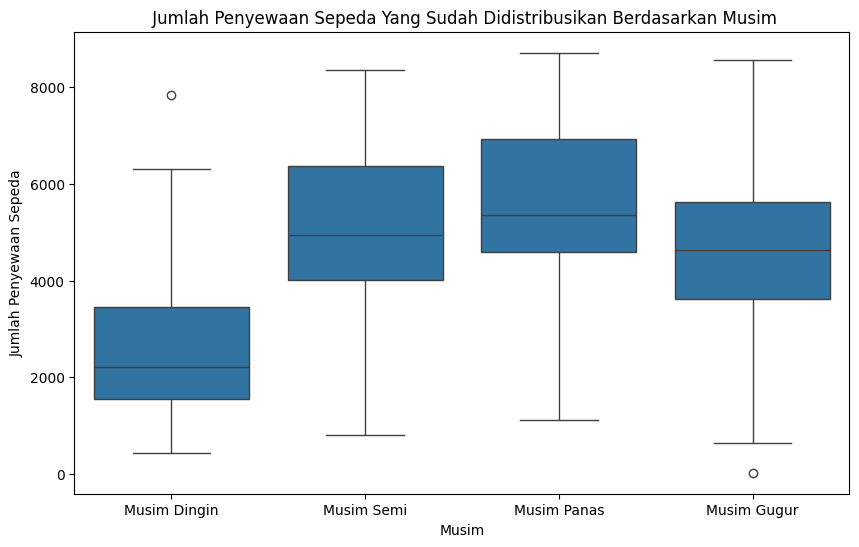

In [25]:
# Visualisasi jumlah penyewaan sepeda yang sudah didistribusikan berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title(' Jumlah Penyewaan Sepeda Yang Sudah Didistribusikan Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Dingin', 'Musim Semi', 'Musim Panas', "Musim Gugur"])
plt.show()

### Pertanyaan 2: Bagaimana pola penyewaan sepeda weekday dan weekend?

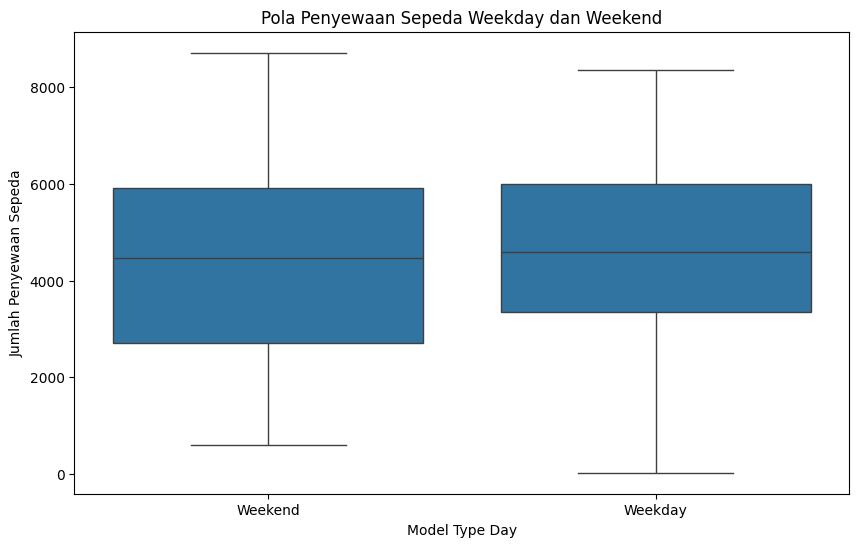

In [26]:
# Visualisasi  pola penyewaan sepeda weekday dan weekend
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.title('Pola Penyewaan Sepeda Weekday dan Weekend')
plt.xlabel('Model Type Day')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['Weekend', 'Weekday'])
plt.show()

## Conclusion

**Conclution pertanyaan 1 : Bagaimana
pihak yang mendistribusikan penyewaan sepeda dihitung dengan jumlah berdasarkan pengaruh musim?**

Pada visualisasi yang telah ditampikan, musim panas menjadi banyak peminat yang ingin menyewa sepeda dikarenakan kondisi cuaca yang mendukung untuk beraktivitas olahraga terutama bersepeda. Jumlah penyewa sepeda berdasarkan empat musim tersebut paling tinggi mediannya adalah musim panas.


**Conclution pertanyaan 2 : Bagaimana pola penyewaan sepeda weekday dan weekend?**
Seperti yang kita ketahui pada visualisasi yang telah ditampilkan, bahwa peminat yang ingin menyewa sepeda banyak pada waktu weekend dikarenakan kebanyakan digunakan waktu refresing dari pekerjaan dan kantoran pun libur. Hampir semua umur juga kebanyakan lebih enjoy pada weekend. Distribusi penyewaan weekend memiliki range yang lebih luas.